# Machine Failure Classification

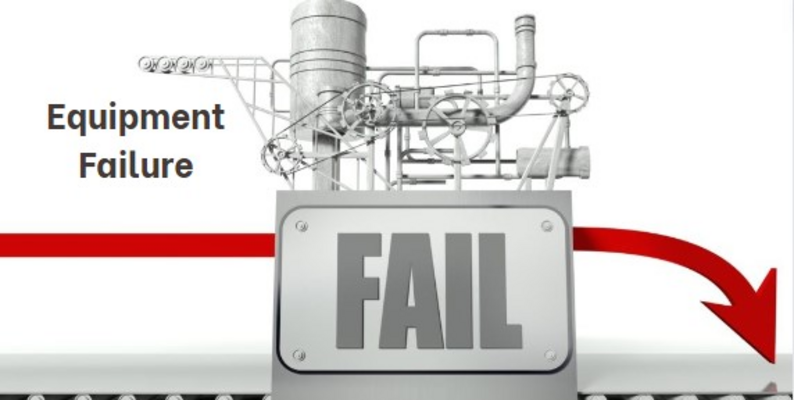

## About Dataset

This dataset is designed for predicting machine failure risk in industrial manufacturing environments, using real-time sensor data from various types of machinery. It includes 1,000 samples representing different time intervals of operation, with each sample providing key sensor measurements relevant to machine health monitoring and predictive maintenance.

The dataset consists of the following features:

- **Temperature (°C)**: Continuous data representing the temperature at the machine's critical points. Higher temperatures may indicate potential issues due to overheating.
- **Vibration (Hz)**: Frequency of machine vibrations. Abnormal vibrations can signal mechanical misalignment, imbalance, or wear.
- **Power Usage (kW)**: Power consumption levels of the machine. Spikes in power usage may indicate increased load or potential mechanical issues.
- **Humidity (%)**: Environmental humidity around the machine. High humidity levels could affect machine performance and lead to failure over time.
- **Machine Type**: Categorical data indicating the type of machine (e.g., "Drill", "Lathe", "Mill"). Different machine types may have unique failure patterns.


Target Variable:

- **Failure Risk**: A binary label where 0 indicates normal operation, and 1 indicates that the machine is at risk of failure.

This dataset will be used to develop predictive models for detecting machine failures early, enabling maintenance teams to address issues before they lead to costly downtime. It’s also useful for exploring trends in sensor readings associated with failure events and understanding the impact of different features on machine health.

## Loading Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Understanding

In [3]:
df = pd.read_csv('machine_failure_dataset.csv')
df.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


### Information about the data

The dataset has 1000 rows and 6 columns.
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


None

------------------------------------------------------------------------------------------


,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.193321,50.354181,10.011668,29.906404,0.300000
std,9.792159,4.987272,1.966909,5.135663,0.458487
min,37.587327,35.298057,3.960976,15.352757,0.000000
25%,63.524097,46.968792,8.704001,26.312898,0.000000
50%,70.253006,50.315386,9.999498,30.000923,0.000000
75%,76.479439,53.644411,11.321831,33.334727,1.000000
max,108.527315,65.965538,17.852475,46.215465,1.000000


------------------------------------------------------------------------------------------
Temperature     0
Vibration       0
Power_Usage     0
Humidity        0
Machine_Type    0
Failure_Risk    0
dtype: int64
------------------------------------------------------------------------------------------
Duplicates in the dataset: 0
------------------------------------------------------------------------------------------
Temperature     1000
Vibration       1000
Power_Usage     1000
Humidity        1000
Machine_Type       3
Failure_Risk       2
dtype: int64
------------------------------------------------------------------------------------------
Temperature     float64
Vibration       float64
Power_Usage     float64
Humidity        float64
Machine_Type     object
Failure_Risk      int64
dtype: object
------------------------------------------------------------------------------------------


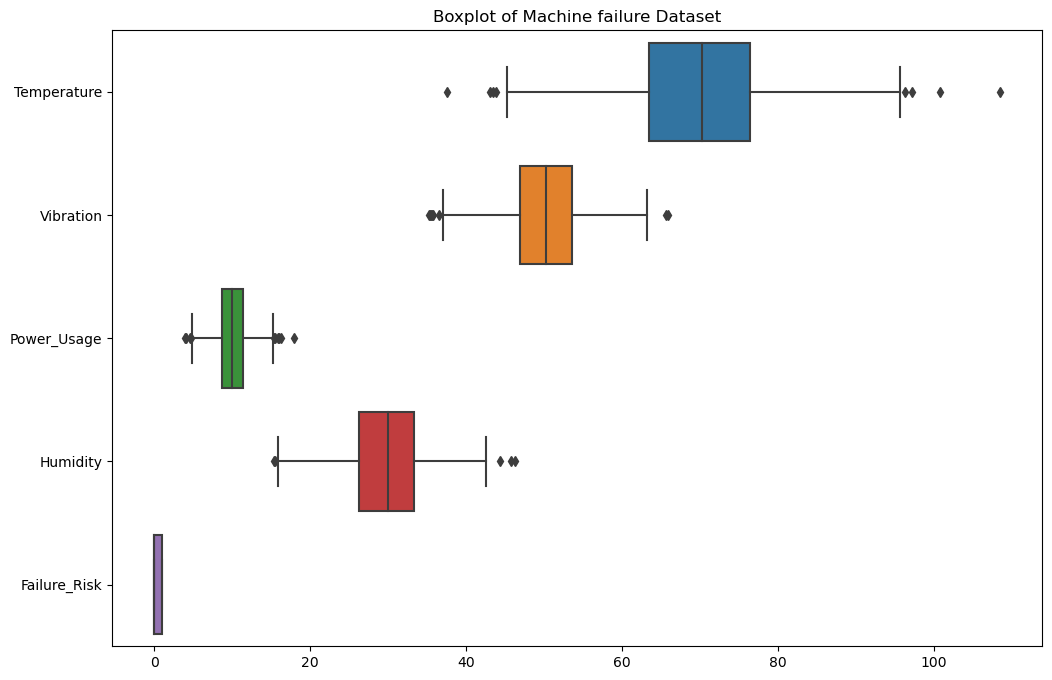

In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print('---' * 30)
display(df.info())
print('---' * 30)
display(df.describe())
print('---' * 30)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
print('---' * 30)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicates in the dataset: {duplicates}')
print('---' * 30)

# Check for unique values in each column
unique_values = df.nunique()
print(unique_values)
print('---' * 30)

# Check for data types of each column
print(df.dtypes)
print('---' * 30)

# Check for outliers in the dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Machine failure Dataset')
plt.show()

## Exploratory Data Analysis

### Correlation

<AxesSubplot:title={'center':'Correlation between variables'}>

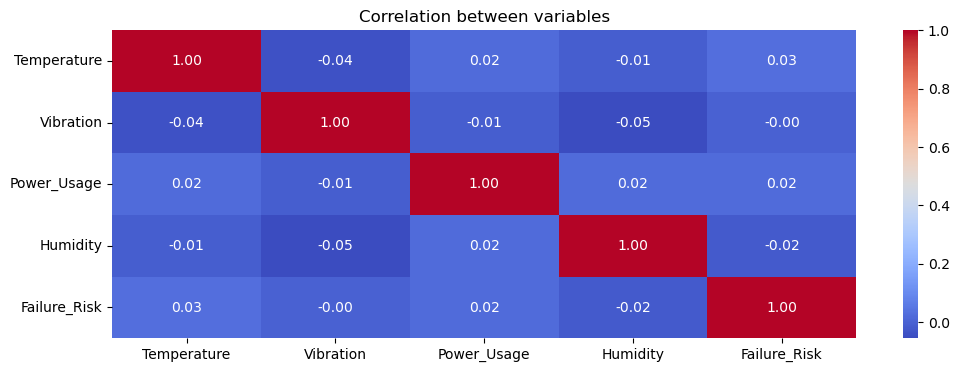

In [6]:
# Check for the correlation between variables
plt.figure(figsize=(12, 4))
correlation = df.select_dtypes(exclude='object')
plt.title('Correlation between variables')

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

### Distribution of categorical variables

In [7]:
df.columns

Index(['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Machine_Type',
       'Failure_Risk'],
      dtype='object')

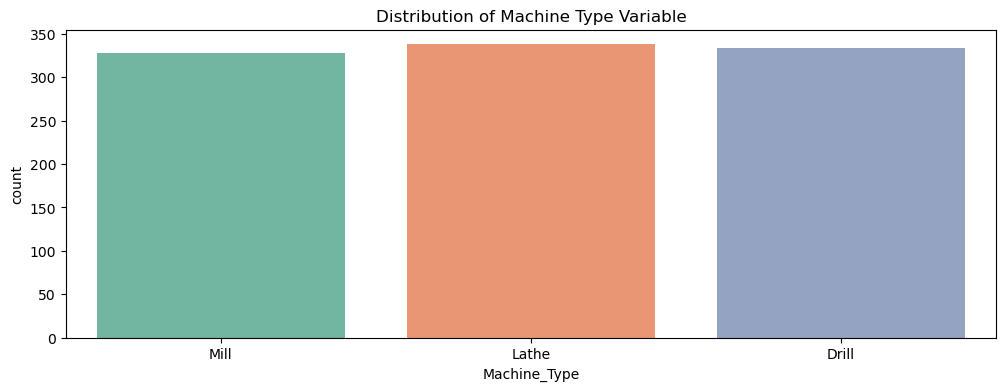

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


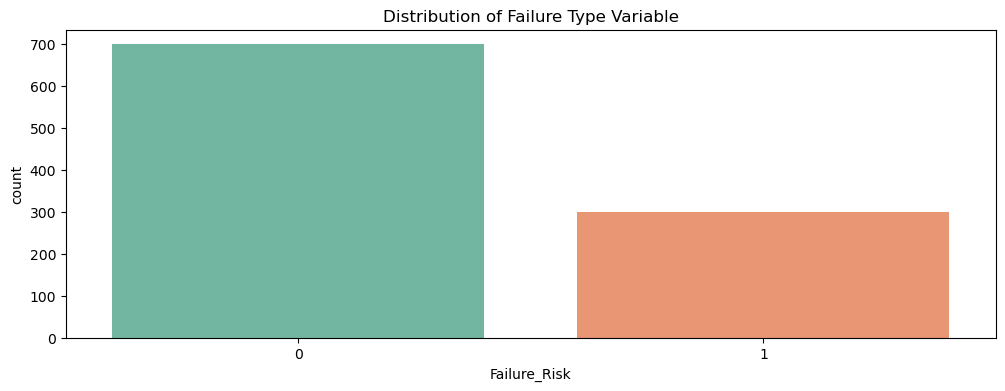

In [14]:
# Check for the distribution of the Machine Type
plt.figure(figsize=(12, 4))
sns.countplot(x='Machine_Type', data=df, palette='Set2')
plt.title('Distribution of Machine Type Variable')
plt.show()
print('---' * 70)

# Check for the distribution of the Failure Risk
plt.figure(figsize=(12, 4))
sns.countplot(x='Failure_Risk', data=df, palette='Set2')
plt.title('Distribution of Failure Type Variable')
plt.show()

## Data Preprocessing

### Encoding Categorical features

In [22]:
df_copy = df.copy()
# Convert categorical variables to numerical using one-hot encoding
df_copy = pd.get_dummies(df, columns=['Machine_Type'], drop_first=False, dtype='int')
df_copy.head()

,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk,Machine_Type_Drill,Machine_Type_Lathe,Machine_Type_Mill
0,74.967142,56.996777,8.649643,20.460962,1,0,0,1
1,68.617357,54.623168,9.710963,25.698075,0,0,1,0
2,76.476885,50.298152,8.415160,27.931972,1,1,0,0
3,85.230299,46.765316,9.384077,39.438438,1,0,1,0
4,67.658466,53.491117,6.212771,32.782766,1,1,0,0


### Splitting into independent and dependent variables

In [24]:
X = df_copy.drop(['Failure_Risk'], axis=1)
y = df_copy['Failure_Risk']

# shape of X and y

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (1000, 7)
Shape of y: (1000,)


### Scaling the independent variable

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.48775857,  1.33257619, -0.6928164 , ..., -0.70816771,
        -0.71454462,  1.43135617],
       [-0.1610219 ,  0.85640475, -0.15295893, ..., -0.70816771,
         1.39949272, -0.69863813],
       [ 0.64201457, -0.01124009, -0.81209018, ...,  1.41209489,
        -0.71454462, -0.69863813],
       ...,
       [ 0.63502009, -0.95562025, -1.2692192 , ..., -0.70816771,
        -0.71454462,  1.43135617],
       [-0.60334651, -0.23461749,  0.33403332, ..., -0.70816771,
        -0.71454462,  1.43135617],
       [ 0.5652763 , -0.81822996, -0.16388547, ..., -0.70816771,
        -0.71454462,  1.43135617]])

### Training the testing set

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 7)

(200, 7)

(800,)

(200,)

## Machine Learning

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42, C=2, solver='liblinear', penalty='l1')

# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [62]:
# Predict the target variable
log_pred = log_reg.predict(X_test)
log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Evaluation

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Confusion Matrix:
[[140   0]
 [ 60   0]]


<Figure size 1200x400 with 0 Axes>

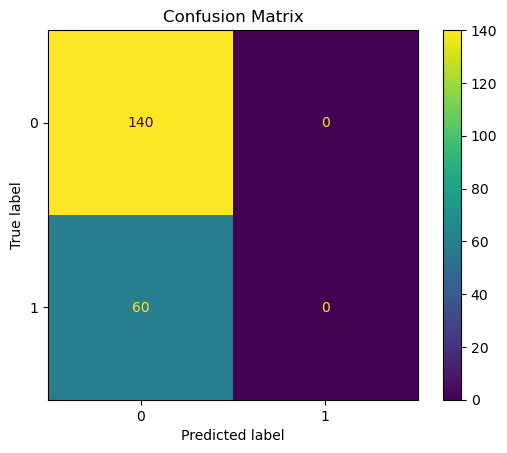

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Classification report
print(classification_report(y_test, log_pred))

# Confusion matrix
cm = confusion_matrix(y_test, log_pred)
print(f'Confusion Matrix:\n{cm}')

# Plotting confusion matrix
plt.figure(figsize=(12,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


### SVM (Support Vector Machine)

In [64]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42, C=1)

# Fit the model
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [65]:
# Predict the target variable
svm_pred = svm_model.predict(X_test)
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Evaluation

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Confusion Matrix:
[[140   0]
 [ 60   0]]


<Figure size 1200x400 with 0 Axes>

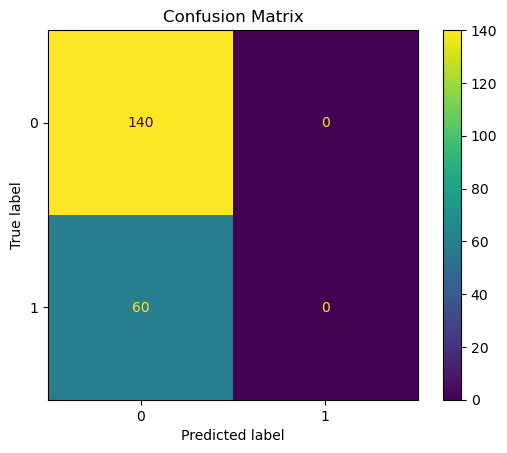

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred)
print(f'Confusion Matrix:\n{cm}')

# Plotting confusion matrix
plt.figure(figsize=(12,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=4)

# Fit the model
dtree.fit(X_train, y_train)
dtree

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

In [79]:
# Predict the target variable
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

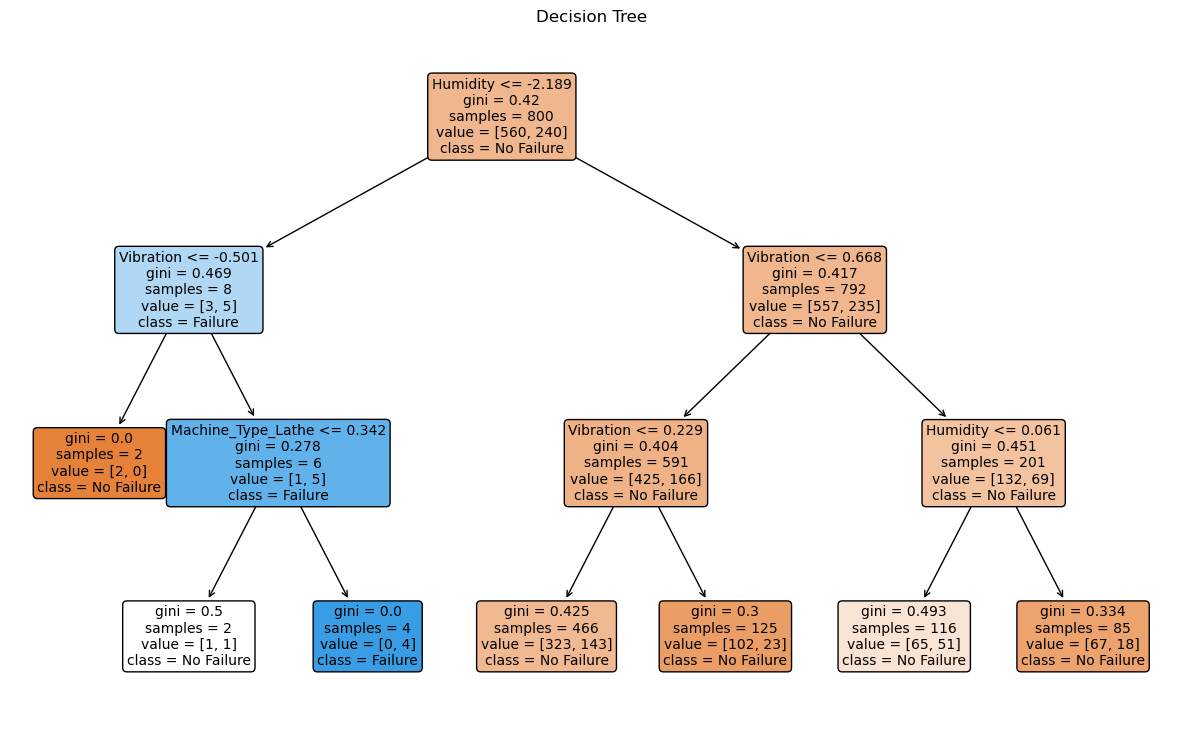

In [84]:
from sklearn.tree import plot_tree
class_ = ['No Failure', 'Failure']
plt.figure(figsize=(15, 9))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True, fontsize=10, class_names=class_)
plt.title('Decision Tree')
plt.show()

#### Evaluation

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       140
           1       0.42      0.08      0.14        60

    accuracy                           0.69       200
   macro avg       0.56      0.52      0.47       200
weighted avg       0.62      0.69      0.61       200

Confusion Matrix:
[[133   7]
 [ 55   5]]


<Figure size 1200x400 with 0 Axes>

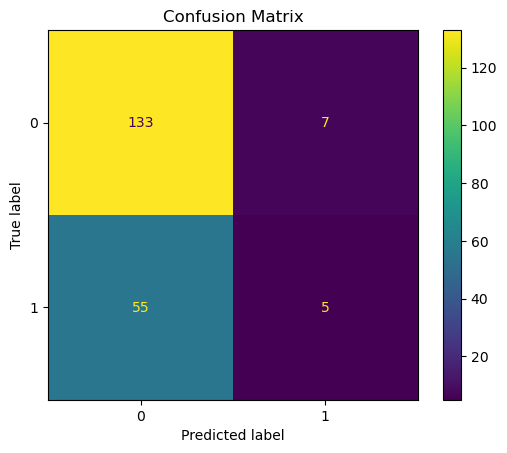

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Classification report
print(classification_report(y_test, dtree_pred))

# Confusion matrix
cm = confusion_matrix(y_test, dtree_pred)
print(f'Confusion Matrix:\n{cm}')

# Plotting confusion matrix
plt.figure(figsize=(12,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5, min_samples_split=4)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200,
                       random_state=42)

In [71]:
# Predict the target variable
rf_pred = rf_model.predict(X_test)
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Evaluation

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Confusion Matrix:
[[140   0]
 [ 60   0]]


<Figure size 1200x400 with 0 Axes>

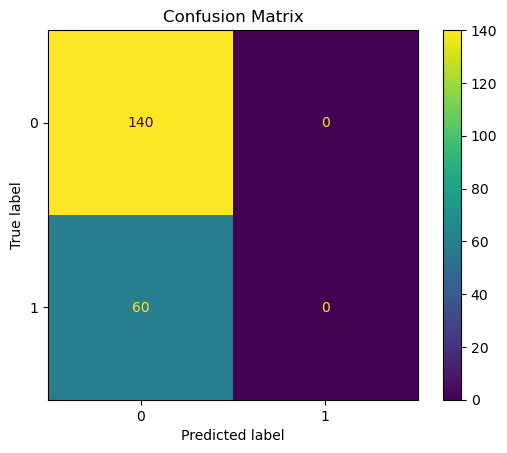

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Classification report
print(classification_report(y_test, rf_pred))

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
print(f'Confusion Matrix:\n{cm}')

# Plotting confusion matrix
plt.figure(figsize=(12,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

           Model  Accuracy
0   Logistic Reg      70.0
1            SVM      70.0
2  Decision Tree      69.0
3  Random Forest      70.0



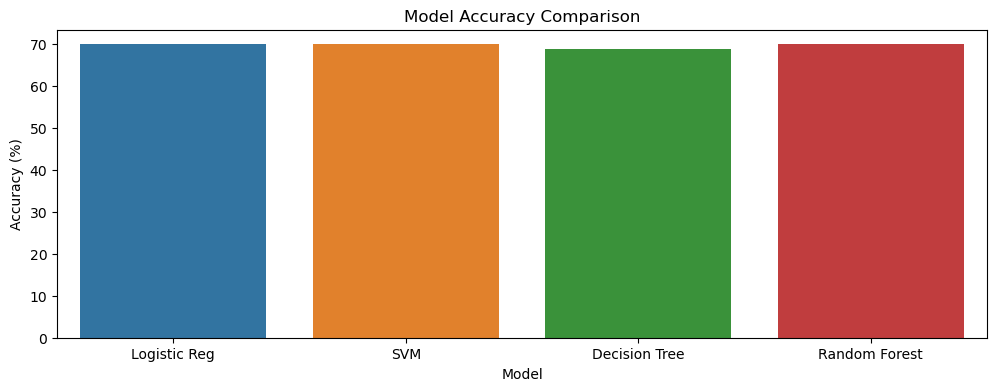

In [73]:
# Creating a dictionary to store the model scores
from sklearn.metrics import accuracy_score
model_scores = {
    'Model': ['Logistic Reg', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        round(accuracy_score(y_test, log_pred) * 100, 2),
        round(accuracy_score(y_test, svm_pred) * 100, 2),
        round(accuracy_score(y_test, dtree_pred) * 100, 2),
        round(accuracy_score(y_test, rf_pred)* 100, 2)
    ]
}

# Creating a DataFrame from the dictionary
score_df = pd.DataFrame(model_scores)
print(score_df)

print()

# Visualizing score df
plt.figure(figsize=(12, 4))
sns.barplot(x='Model', y='Accuracy', data=score_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()

In [85]:
pip install streamlit

     ---------------------------------------- 9.8/9.8 MB 448.1 kB/s eta 0:00:00
     -------------------------------------- 15.9/15.9 MB 991.8 kB/s eta 0:00:00
     -------------------------------------- 25.5/25.5 MB 597.3 kB/s eta 0:00:00
     -------------------------------------- 731.2/731.2 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 434.6/434.6 kB 631.5 kB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 207.6/207.6 kB 972.2 kB/s eta 0:00:00
     ---------------------------------------- 45.8/45.8 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 325.5/325.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Atte

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PC\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

